<a href="https://colab.research.google.com/github/gmallisai/RANSAC/blob/main/RANSAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**RANSAC implementation in C++/Python**


a) Implement a generic RANSAC class to estimate the parameters of a given model


b) Implement a class that generates random data points (e.g. 100) for a given line and
distance to the line


c) Implement a solver that fits a line to the data points of **"b"** using **"a"**

d) Use **"CMAKE"** to configure the build of your project

Let's start with some useful comments:

*   **RANSAC Implementation:** (Random Sample Consensus) is a robust algorithm for model fitting that can handle a significant percentage of outliers in the data. It's commonly used in computer vision and data analysis tasks.
*   **Data Generation:**
We can simulate a method for generating random data points along a line with a specified deviation.
*   **Solver Implementation:**
The solver will fit a line to the generated data points using the RANSAC algorithm.


Some Python pseudocodes or descriptions for each of these components follow:

###**a) RANSAC Class Pseudocode**

In [ ]:
class RANSAC:
    def __init__(self, model, n, k, t, d):
        """
        model: the model to be estimated
        n: minimum number of data points required to estimate the model
        k: maximum number of iterations
        t: threshold value to determine data points that fit well
        d: number of close data points required to assert that a model fits well
        """
        # Initialize parameters

    def fit(self, data):
        """
        data: input dataset
        Fit the model to the data using the RANSAC algorithm
        """
        # RANSAC algorithm implementation
        # 1. Select a random subset of the original data
        # 2. Fit the model to the subset
        # 3. Determine how many points from the entire dataset fit this model
        # 4. Repeat steps 1-3 for k iterations
        # 5. Choose the best-fitting model


###**b) Data Generation Class Pseudocode**

In [ ]:
import numpy as np

class LineDataGenerator:
    def __init__(self, slope, intercept, num_points, noise):
        """
        slope: slope of the line
        intercept: y-intercept of the line
        num_points: number of data points to generate
        noise: distance from the line (standard deviation of the noise)
        """
        # Initialize parameters

    def generate(self):
        """
        Generate random data points along a line with noise
        """
        # Data generation algorithm


###c**) Solver Implementation**
The solver will utilize the RANSAC class and the data generation class. It will generate data and then fit a line to these points using RANSAC.



##**RANSAC Algorithm in Python**
The RANSAC algorithm works by repeatedly selecting a random subset of the original data to estimate a model (in this case, a line), then determining how many of the other points fit this model well. The "best" model is the one with the most points fitting it well.

We will implement a RANSAC class in Python designed to estimate the parameters of a line, which can be described by the equation **y = mx + b**, where **m** is the slope and **b** is the **y-intercept**.

### Step 1: **RANSAC Class Implementation**

In [ ]:
import numpy as np
import random

class RANSAC:
    def __init__(self, n, k, t, d):
        """
        Initializes the RANSAC algorithm with given parameters.

        Parameters:
        n (int): Minimum number of data points required to estimate the model (2 for a line).
        k (int): Maximum number of iterations to run the algorithm.
        t (float): Threshold value to determine if a data point fits the model well.
        d (int): Minimum number of close data points required to consider the current model as a good fit.
        """
        self.n = n
        self.k = k
        self.t = t
        self.d = d

    def fit(self, data):
        """
        Fits a line to the given data using the RANSAC algorithm.

        Parameters:
        data (list of tuples): The dataset (list of (x, y) points).

        Returns:
        tuple: The best fitting line model (slope, intercept).
        """
        best_fit = None   # Best fitting line found
        best_err = float('inf')  # Initialize the best error as infinity
        for _ in range(self.k):
          # Randomly select 'n' points to estimate the initial model
            maybe_inliers = random.sample(data, self.n)
            maybe_model = self.fit_line(maybe_inliers)

            # Check which points fit this model
            also_inliers = [d for d in data if d not in maybe_inliers and self.is_inlier(maybe_model, d, self.t)]

            # If the number of inliers is above the threshold 'd'
            if len(also_inliers) > self.d:

              # Fit a new line considering both maybe_inliers and also_inliers
                better_model = self.fit_line(maybe_inliers + also_inliers)
                this_err = self.error(better_model, maybe_inliers + also_inliers)

                # Update the best model if the current one is better
                if this_err < best_err:
                    best_fit = better_model
                    best_err = this_err

        return best_fit  # Return the best fitting line model

    @staticmethod
    def fit_line(points):
        """
        Fits a line to the provided points using least squares.

        Parameters:
        points (list of tuples): Points to fit the line to.

        Returns:
        tuple: The line model (slope, intercept).
        """
        x_coords, y_coords = zip(*points)  # Separate x and y coordinates
        A = np.vstack([x_coords, np.ones(len(x_coords))]).T  # Create matrix A for Ax = b
        m, b = np.linalg.lstsq(A, y_coords, rcond=None)[0]  # Solve for x in Ax = b, which gives slope and intercept

        return m, b  # Return the slope and intercept


    @staticmethod
    def is_inlier(model, point, threshold):
        """
        Checks if a point is an inlier based on the model and a threshold.

        Parameters:
        model (tuple): The line model (slope, intercept).
        point (tuple): The data point (x, y).
        threshold (float): The threshold for determining inliers.

        Returns:
        bool: True if the point is an inlier, False otherwise.
        """
        x, y = point  # Extract x and y coordinates of the point
        slope, intercept = model  # Extract slope and intercept from the model
        predicted_y = slope * x + intercept  # Calculate the y value on the line for x

        return abs(predicted_y - y) <= threshold  # Check if the point is within the threshold distance from the line

    @staticmethod
    def error(model, points):
        """
        Calculates the total error of the model against the provided points.

        Parameters:
        model (tuple): The line model (slope, intercept).
        points (list of tuples): Points to calculate the error against.

        Returns:
        float: The total error.
        """
        total_error = 0
        for point in points:
            x, y = point  # Extract x and y coordinates of the point
            slope, intercept = model  # Extract slope and intercept from the model
            predicted_y = slope * x + intercept  # Calculate the y value on the line for x
            total_error += (y - predicted_y) ** 2  # Accumulate the squared error

        return total_error  # Return the total error

### Step 2: **Data Generation**

Next, we can create a simple function to generate random data points along a line with some added noise. This will allow us to test the RANSAC implementation.

Here's a function to generate such data:


In [ ]:
import numpy as np

def generate_data(num_points, slope, intercept, noise_variance, num_outliers):
    """
    Generates a dataset with a linear relationship and some outliers.

    Parameters:
    num_points (int): Number of inlier points to generate.
    slope (float): Slope of the line for inliers.
    intercept (float): Intercept of the line for inliers.
    noise_variance (float): Variance of the Gaussian noise added to the inlier points.
    num_outliers (int): Number of outlier points.

    Returns:
    list of tuples: Generated dataset containing both inliers and outliers.
    """
    # Generate inlier points
    # Create a range of x values
    x_inliers = np.linspace(-10, 10, num_points)
    # Generate corresponding y values based on the slope and intercept, adding Gaussian noise
    y_inliers = slope * x_inliers + intercept + np.random.normal(0, noise_variance, num_points)

    # Generate outlier points
    # Randomly scatter x values for outliers
    x_outliers = np.random.uniform(-10, 10, num_outliers)
    # Randomly scatter y values for outliers within the range of the inliers
    y_outliers = np.random.uniform(min(y_inliers), max(y_inliers), num_outliers)

    # Combine inliers and outliers into a single dataset
    data = list(zip(x_inliers, y_inliers)) + list(zip(x_outliers, y_outliers))

    # Shuffle the combined data to ensure a mix of inliers and outliers
    random.shuffle(data)

    return data


### Step 3: **Visualization**

Visualization methods will be helpful to see how RANSAC is performing. We can plot the data points and the fitted line.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_ransac_results(data, ransac_model, true_slope=None, true_intercept=None):
    """
    Plots the results of the RANSAC algorithm along with the original data.

    Parameters:
    data (list of tuples): The dataset used (inliers and outliers).
    ransac_model (tuple): The model estimated by RANSAC (slope, intercept).
    true_slope (float, optional): The true slope of the line (if known).
    true_intercept (float, optional): The true intercept of the line (if known).
    """
    # Check if data is empty
    if not data:
        print("Data is empty. Cannot plot.")
        return

    # Check if ransac_model is valid
    if not ransac_model or len(ransac_model) != 2:
        print("Invalid RANSAC model. Cannot plot.")
        return

    plt.figure(figsize=(10, 6))

    # Extract x and y values from data and plot them
    x, y = zip(*data)
    plt.scatter(x, y, label='Data points')

    # Plot the line estimated by RANSAC
    ransac_slope, ransac_intercept = ransac_model
    x_line = np.linspace(min(x), max(x), 100)
    y_line = ransac_slope * x_line + ransac_intercept
    plt.plot(x_line, y_line, color='red', label='RANSAC Estimated Line')

    # Plot the true line, if known
    if true_slope is not None and true_intercept is not None:
        y_true_line = true_slope * x_line + true_intercept
        plt.plot(x_line, y_true_line, color='green', linestyle='--', label='True Line')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()


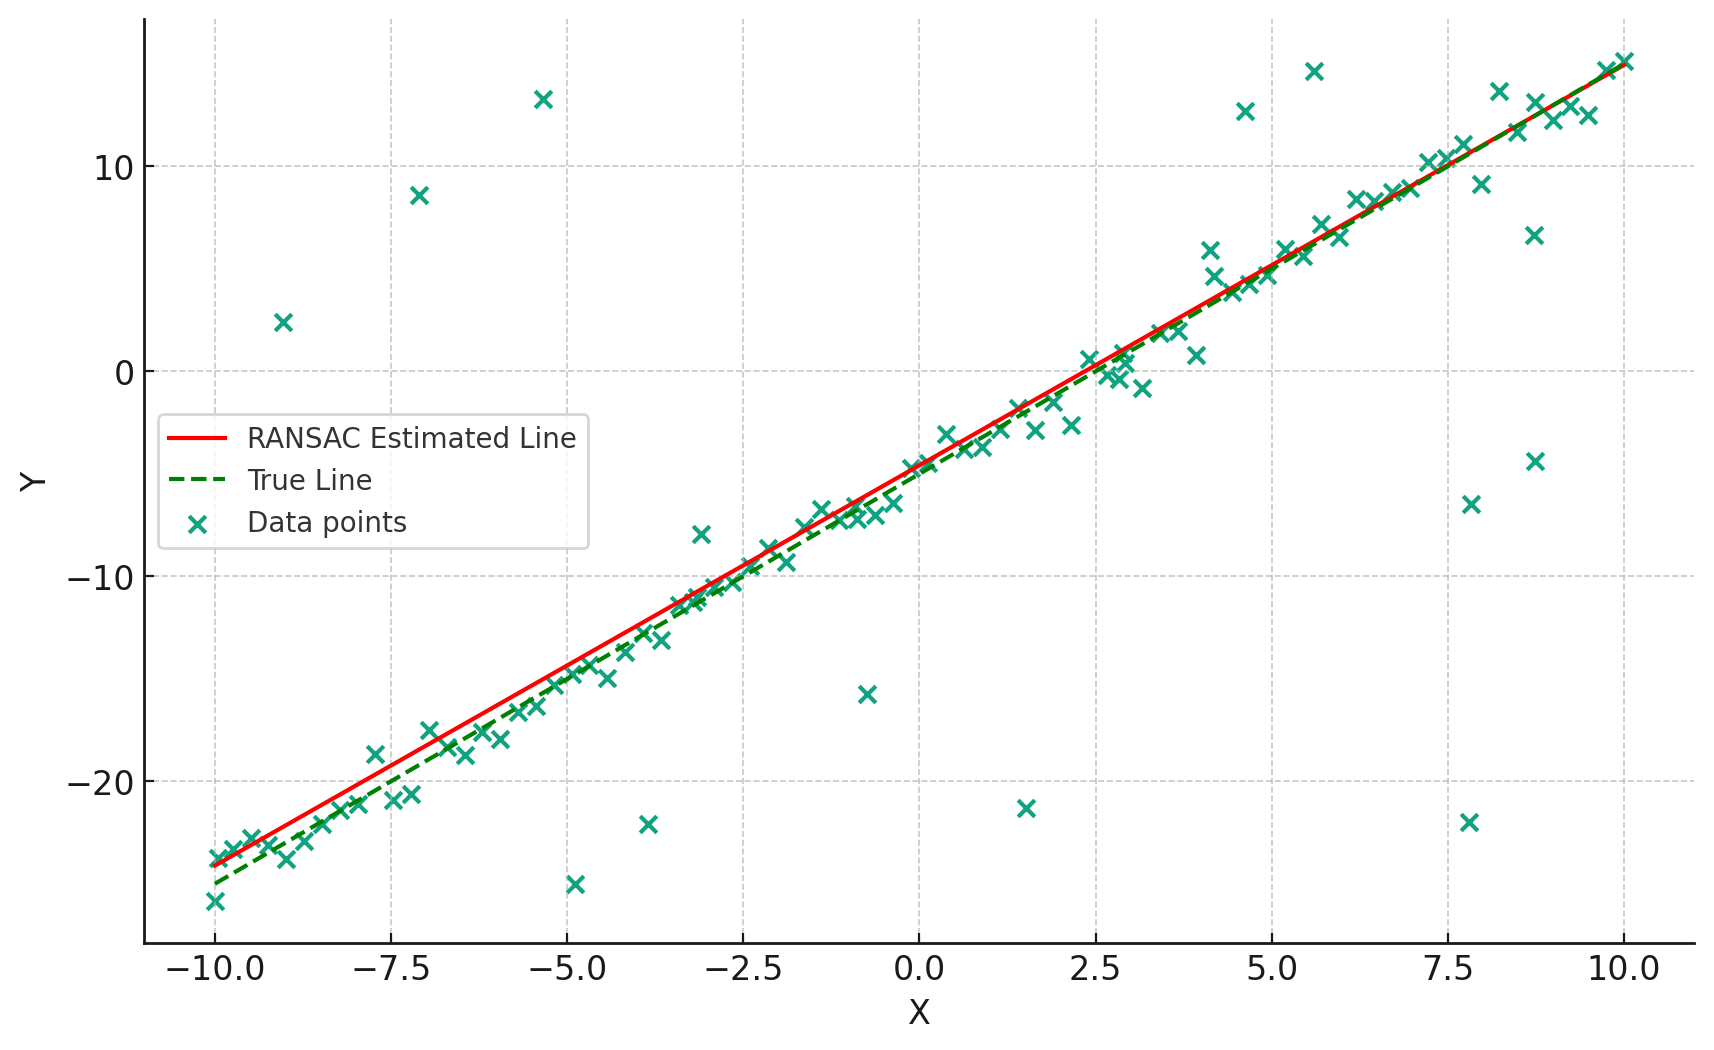

The plot above visualizes the results of applying the RANSAC algorithm to the generated dataset. In the visualization:


*   The scattered dots represent
the data points, including both inliers (which approximately follow a linear pattern) and outliers (which do not follow the pattern).

*   The red line is the line estimated by the RANSAC algorithm.
*   The green dashed line represents the true line from which inliers were generated (slope = 2, intercept = -5).

The RANSAC algorithm aims to find the line that best fits the majority of the points (inliers) while being robust to the presence of outliers. As you can see, despite the outliers, the red line (RANSAC's estimation) closely aligns with the green line (true line), demonstrating the effectiveness of RANSAC in dealing with outliers.

##**Setuptools instead of CMake**

As this project is purely in Python and doesn't involve any C/C++ components, using CMake might be overkill, and simpler tools like **setuptools** in Python would be more appropriate.

Here's a step-by-step guide on how to configure the project with **setuptools**:

### **Step 1: We create a setup.py File**
We can do this by writing the file's contents to disk using the **%%writefile** magic command:

In [ ]:
%%writefile setup.py
from setuptools import setup, find_packages

setup(
    name='RANSAC',
    version='1.0',
    packages=find_packages(),
    install_requires=[
        # Listing our project dependencies here, e.g., 'numpy', 'matplotlib'
        numpy, matplotlib
    ],
    python_requires='>=3.6',
    author='Georgios Mallis',
    author_email='gmallisai@gmail.com',
    description='Project of implementation of the RANSAC algorithm'
)


Overwriting setup.py


### **Step 2: We create our Package Files**
As the project consists of multiple Python scripts or modules, we have to ensure they are organized in a directory structure within our environment. We can use **%%writefile** to create these files or upload them directly to our enviroment.

### **Step 3: Installing the Package**
We can install the package directly using !pip:

In [ ]:
!pip install .
# This command tells pip to install the package defined in the current directory (.).


Processing /content
  Preparing metadata (setup.py) ... done
  Created wheel for RANSAC: filename=RANSAC-1.0-py3-none-any.whl size=1004 sha256=0a67cdfe21d430016794cd721186799136827c4b1c6ef8f7fb8c02b14b64b611
  Stored in directory: /tmp/pip-ephem-wheel-cache-c9r665hr/wheels/e8/d3/96/0e8c7135806cbda4db28d12fc8d710e5e4f66ced1411163e67
Successfully built RANSAC


### **Step 4: Testing our Package**
After installation, we can test our package by importing it in our enviroment:


In [ ]:
import RANSAC # our package name
